In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_12chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 12):
        traces[trace].append(np.load('earm_dreamz_12chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_12chain_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 5):
        logps[trace].append(np.load('earm_dreamz_12chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-821264.33286055]
 [-821264.33286055]
 [-821264.0585526 ]
 ..., 
 [  -4930.73268419]
 [  -4930.73268419]
 [  -4930.73268419]]
Logp of trace:  a  chain:  1  =  [-4957.67256541]
Logp of trace:  a  chain:  2  =  [-4936.4112198]
Logp of trace:  a  chain:  3  =  [-4966.95117983]
Logp of trace:  a  chain:  4  =  [-4970.89024841]
Logp of trace:  b  chain: 0 =  [[-784988.28242683]
 [-727182.5888335 ]
 [-727182.5888335 ]
 ..., 
 [  -4974.5028458 ]
 [  -4974.5028458 ]
 [  -4974.5028458 ]]
Logp of trace:  b  chain:  1  =  [-4998.90573668]
Logp of trace:  b  chain:  2  =  [-4982.79759349]
Logp of trace:  b  chain:  3  =  [-4981.55935674]
Logp of trace:  b  chain:  4  =  [-4974.34183906]
Logp of trace:  c  chain: 0 =  [[-1026245.93229694]
 [ -748100.9600766 ]
 [ -748100.9600766 ]
 ..., 
 [   -4927.88677402]
 [   -4927.88677402]
 [   -4927.88677402]]
Logp of trace:  c  chain:  1  =  [-4979.32217759]
Logp of trace:  c  chain:  2  =  [-4970.55651168]
Logp of trace:  c 

In [5]:
from earm_exp_parameters import earm_rates
uni_idx = []
norm_idx = []
uni_n = 0
norm_n = 0
for i, param in enumerate(model.parameters_rules()):
    if earm_rates[param.name]['type'] == 'uniform':
        uni_idx.append(i)
        uni_n += 1
    elif earm_rates[param.name]['type'] == 'normal':
        norm_idx.append(i)
        norm_n += 1

kf mito:  -14.8452186131  -  0.154781386928
kr mito:  -4.15478138693  -  13.8452186131
kf cyto:  -16.0001205731  -  -1.00012057306
kr cyto:  -2.99987942694  -  15.0001205731


In [6]:
traces['b'][0][:,72]

array([-10.6466023 , -10.4947072 , -10.4947072 , ...,  -8.44115512,
        -8.44115512,  -8.44115512])

In [7]:
traces['a'][0][:,72]

array([-7.31496758, -7.31496758, -7.06640178, ..., -7.44574088,
       -7.44574088, -7.44574088])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    uni_param_n = 0
    norm_param_n = uni_n
    for i, param in enumerate(model.parameters_rules()):
        if i in uni_idx:
            param_trace_dict_a[param.name] = [traces[run][chain][:,uni_param_n] for chain in range(len(traces[run]))]
            uni_param_n += 1
        else:
            param_trace_dict_a[param.name] = [traces[run][chain][:,norm_param_n] for chain in range(len(traces[run]))]
            norm_param_n += 1
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  85  of  105  parameters.
Percent of parameters with GR below 1.2:  80.9523809524
Number of parameters with GR below 1.1:  45  of  105  parameters.
Percent of parameters with GR below 1.1:  42.8571428571


[85, 80.95238095238095, 45, 42.857142857142854]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  95  of  105  parameters.
Percent of parameters with GR below 1.2:  90.4761904762
Number of parameters with GR below 1.1:  83  of  105  parameters.
Percent of parameters with GR below 1.1:  79.0476190476


[95, 90.47619047619048, 83, 79.04761904761905]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  87  of  105  parameters.
Percent of parameters with GR below 1.2:  82.8571428571
Number of parameters with GR below 1.1:  58  of  105  parameters.
Percent of parameters with GR below 1.1:  55.2380952381


[87, 82.85714285714286, 58, 55.23809523809524]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  81  of  105  parameters.
Percent of parameters with GR below 1.2:  77.1428571429
Number of parameters with GR below 1.1:  37  of  105  parameters.
Percent of parameters with GR below 1.1:  35.2380952381


[81, 77.14285714285715, 37, 35.23809523809524]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-8.63756341, -8.63756341, -8.63756341, ..., -8.66224891,
        -8.66224891, -8.66224891]),
 array([-7.88994328, -7.88994328, -7.78781191, ..., -8.32780822,
        -8.32780822, -8.32780822]),
 array([-7.88994328, -7.88994328, -7.67526846, ..., -8.0202309 ,
        -8.0202309 , -8.0202309 ]),
 array([-7.88994328, -7.88994328, -7.88994328, ..., -9.54299087,
        -9.54299087, -9.54299087]),
 array([-7.88994328, -7.88994328, -7.88994328, ..., -8.46481835,
        -8.46481835, -8.46481835]),
 array([-7.88994328, -7.98285142, -7.98285142, ..., -8.18393934,
        -8.18393934, -8.18393934]),
 array([-7.88994328, -8.20326645, -8.20326645, ..., -6.7600328 ,
        -6.7600328 , -6.7600328 ]),
 array([-7.88994328, -7.88994328, -7.53766675, ..., -8.98361722,
        -8.98361722, -8.98361722]),
 array([-7.88994328, -7.88994328, -7.96446398, ..., -8.39510662,
        -8.39510662, -8.39510662]),
 array([-7.88994328, -8.34855601, -8.34855601, ..., -7.313866  ,
        -7.313866  , -7.31

60000
12
60000


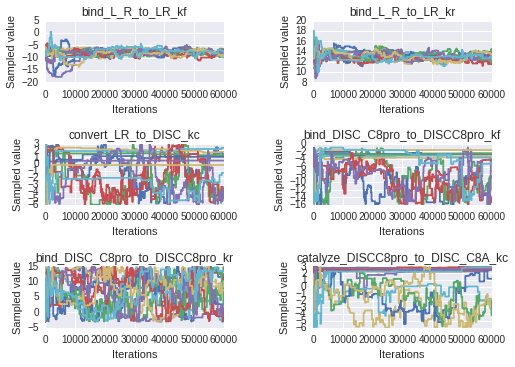

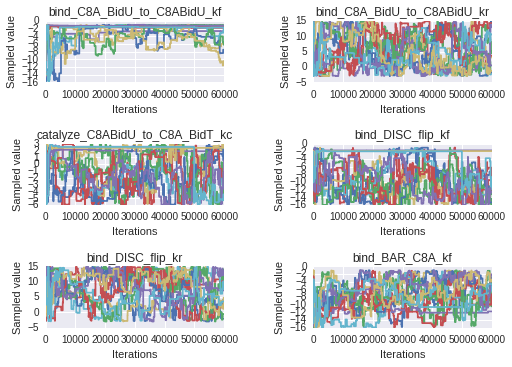

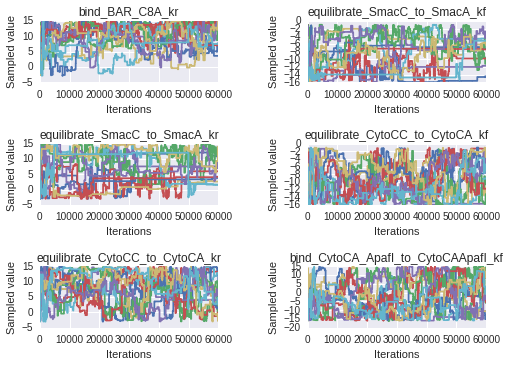

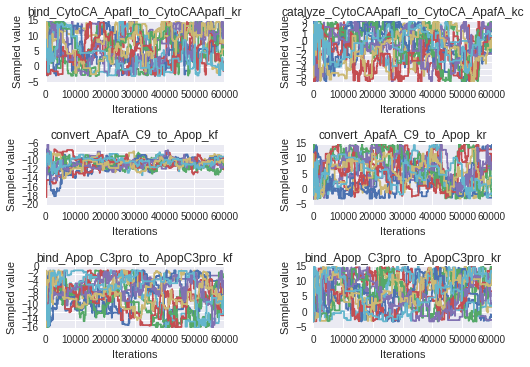

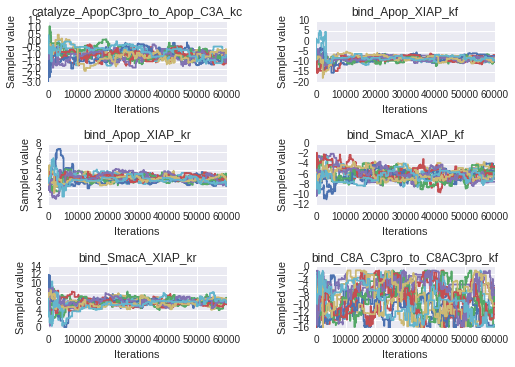

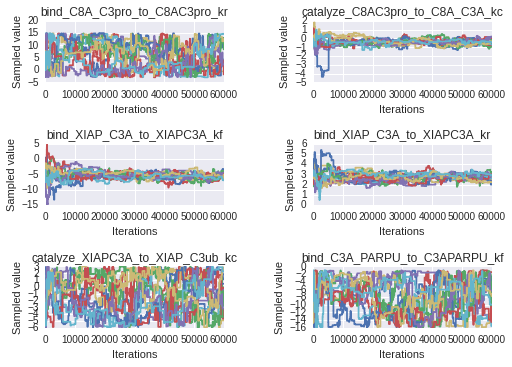

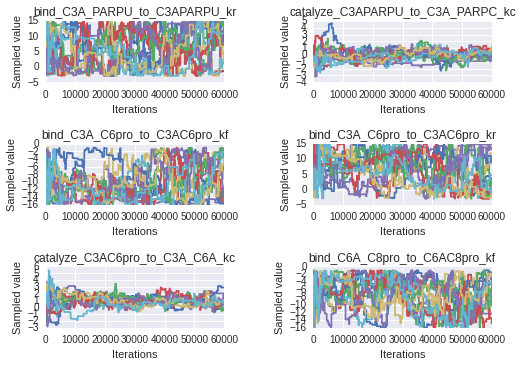

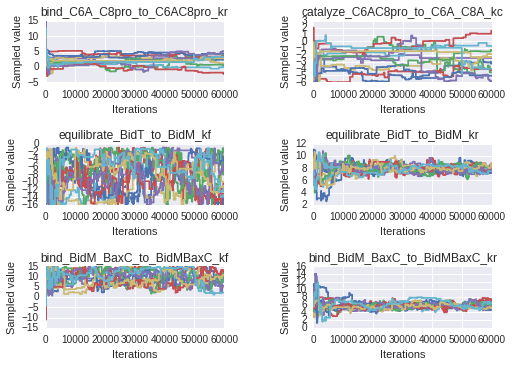

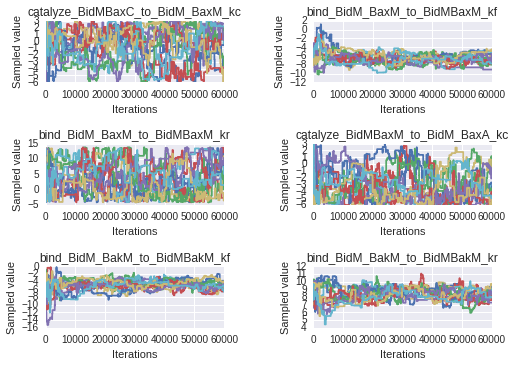

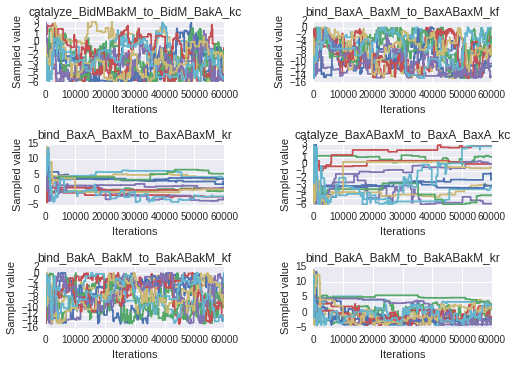

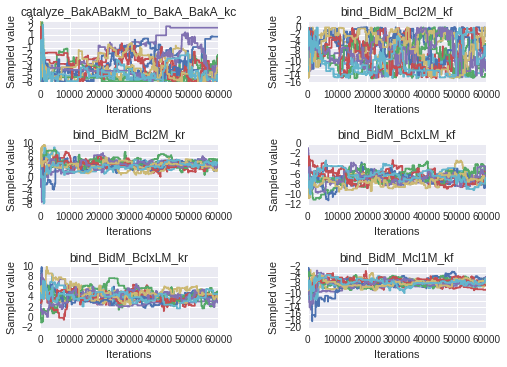

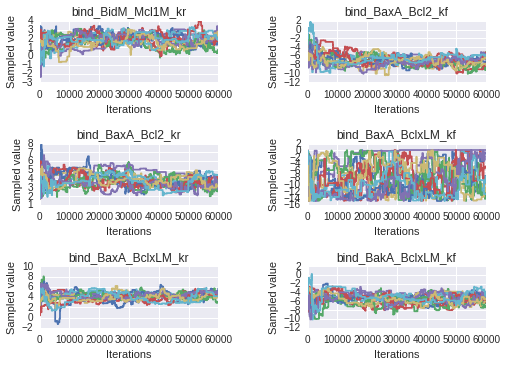

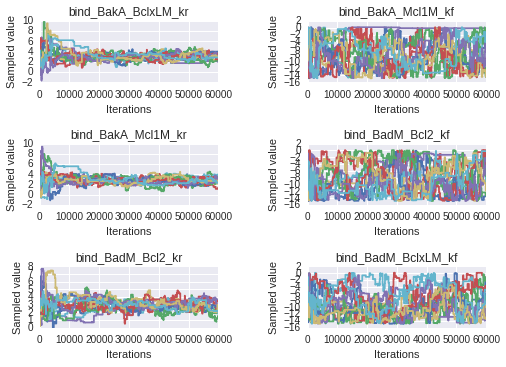

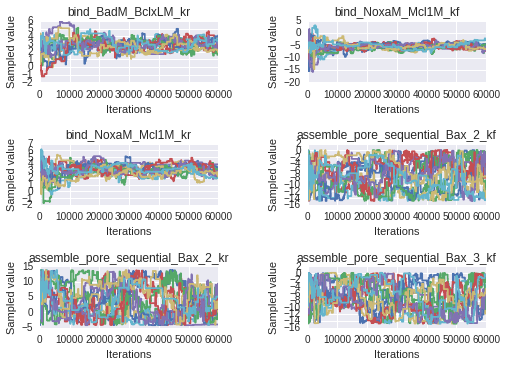

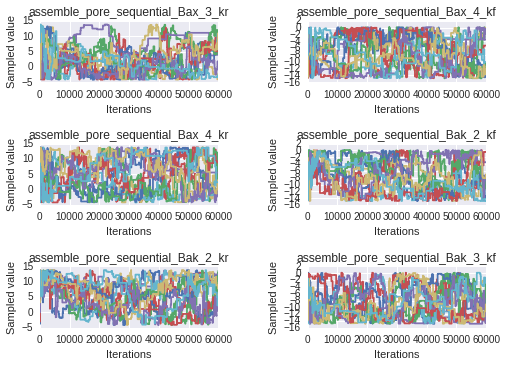

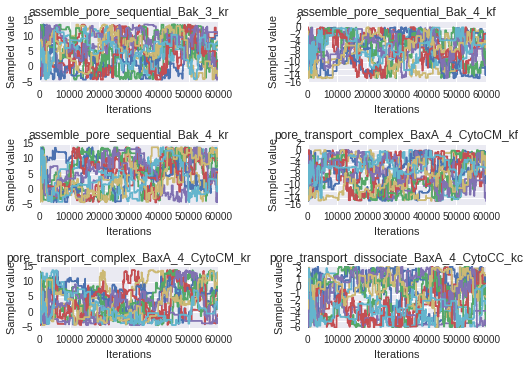

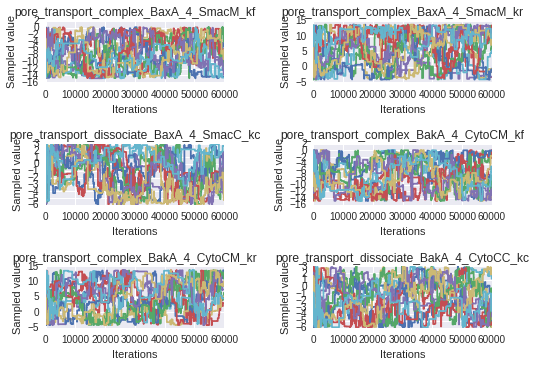

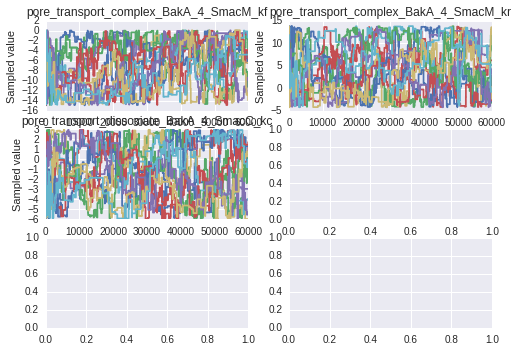

In [14]:
sample_plots(param_trace_dicts['a'])

In [ ]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000)

/gpfs22/local/centos6/python2/2.7.8/x86_64/gcc46/nonet/lib/python2.7/site-packages/matplotlib-1.5.dev1-py2.7-linux-x86_64.egg/matplotlib/pyplot.py:423: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


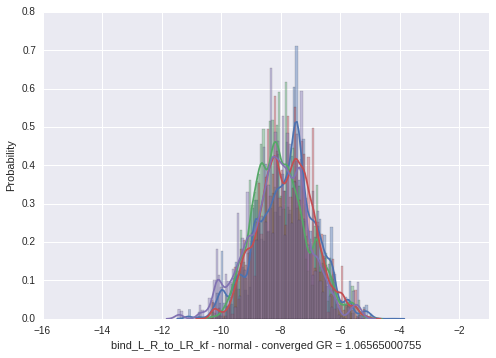

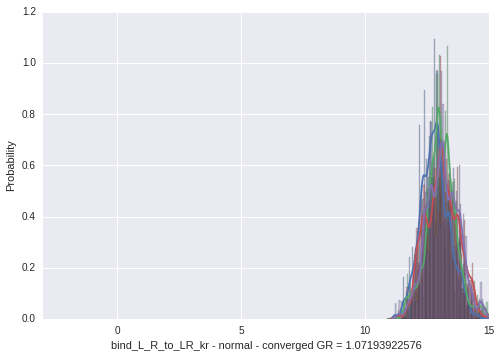

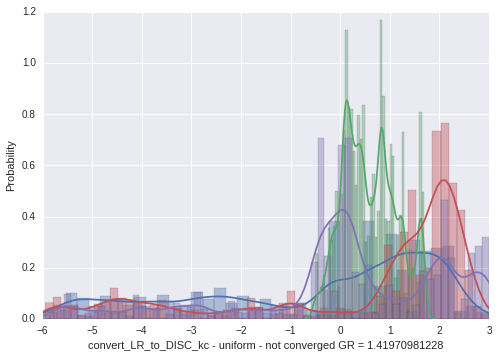

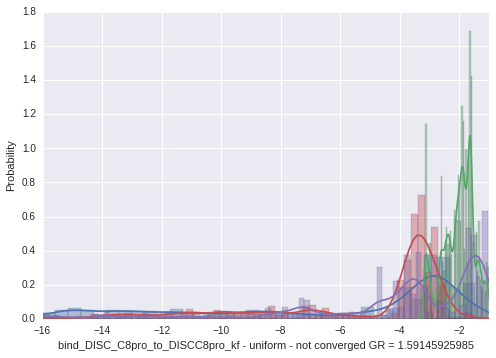

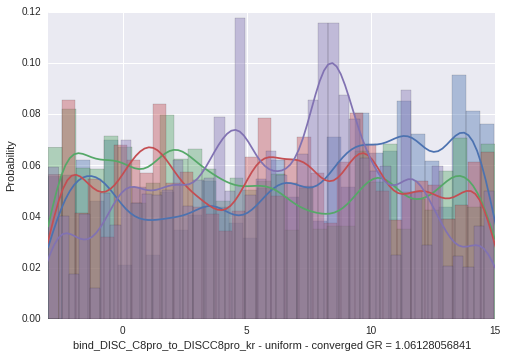

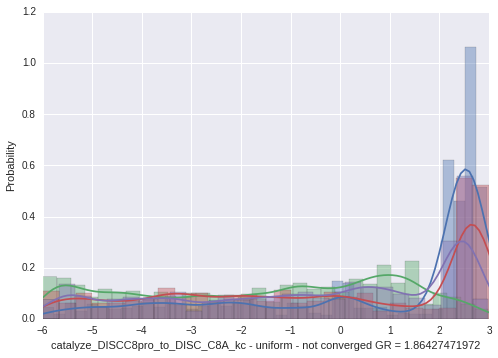

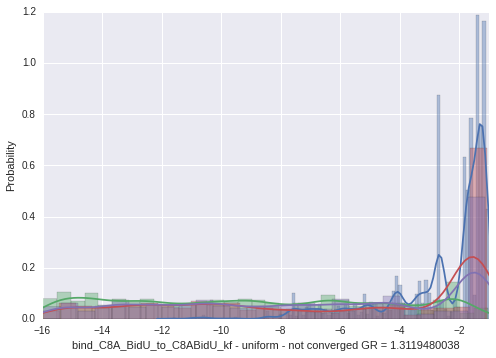

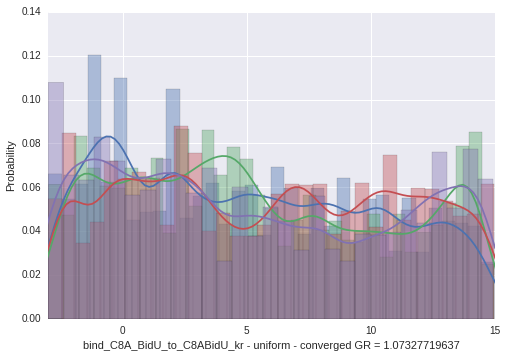

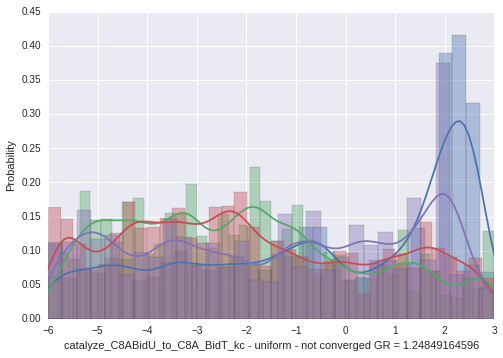

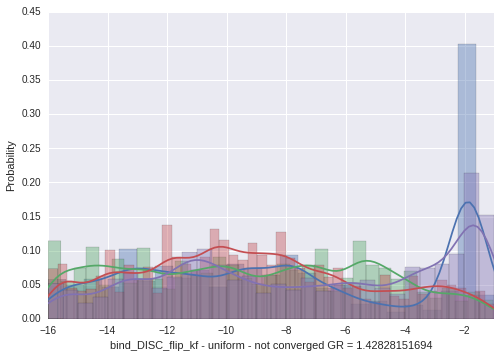

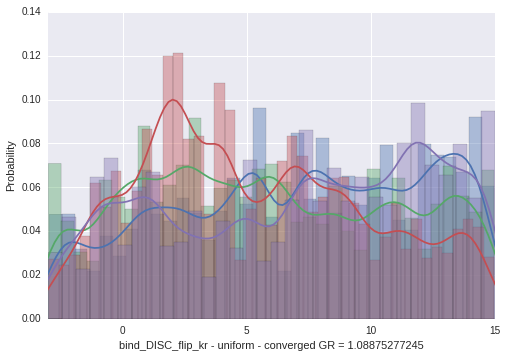

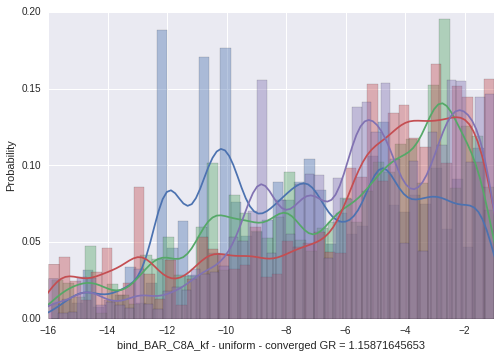

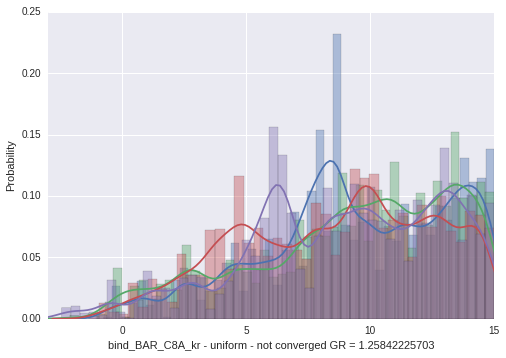

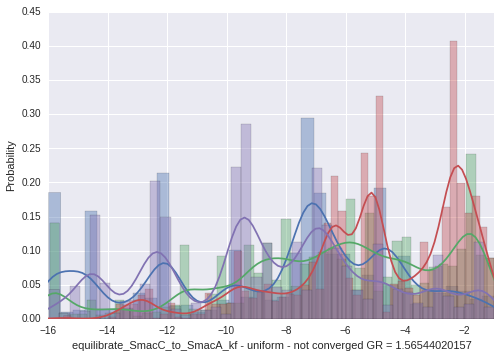

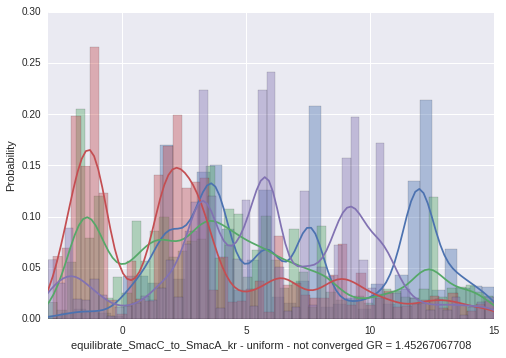

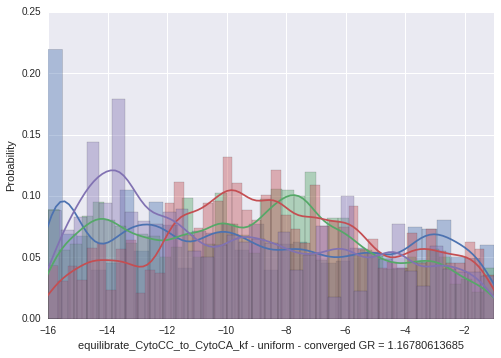

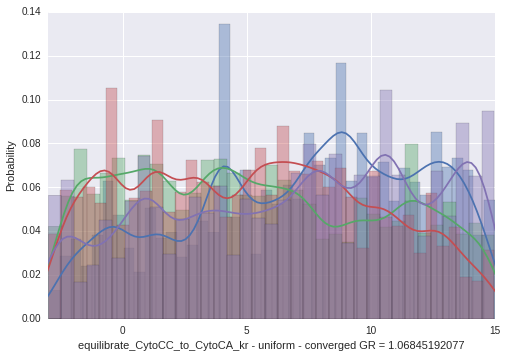

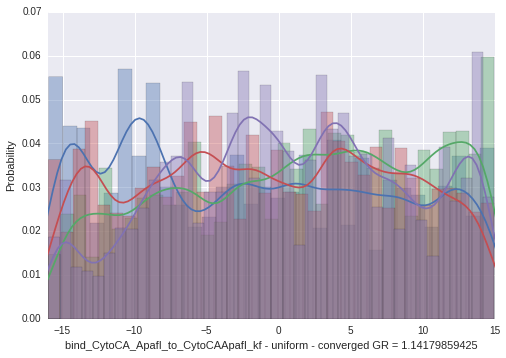

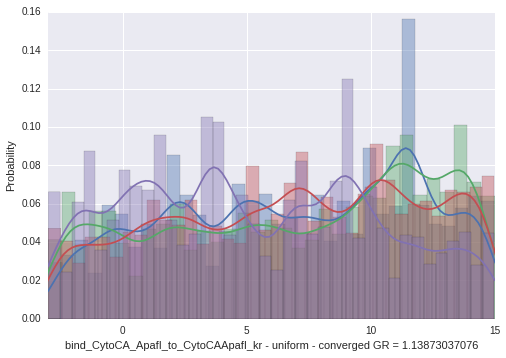

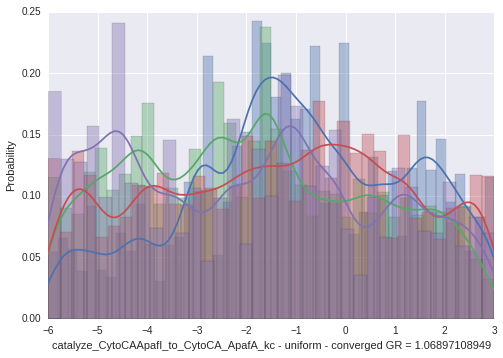

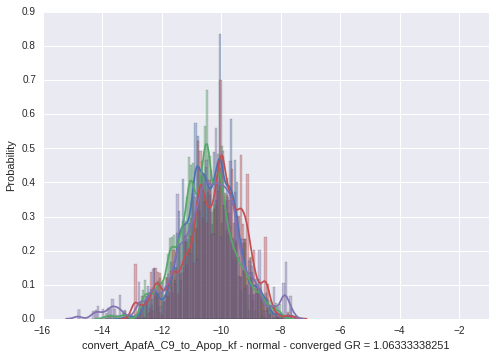

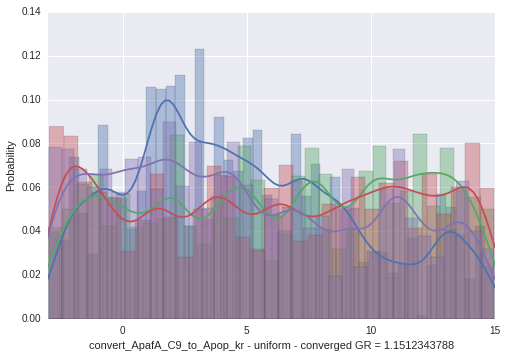

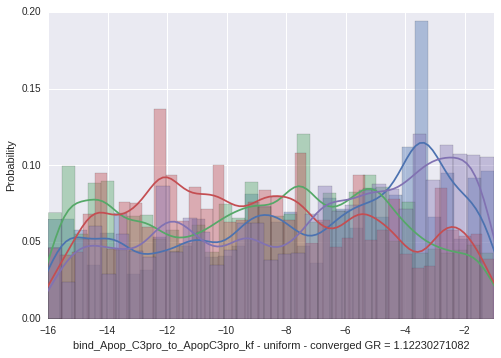

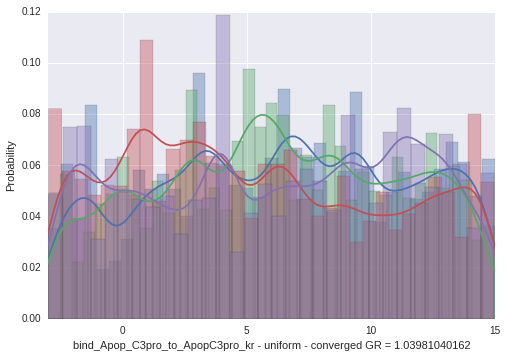

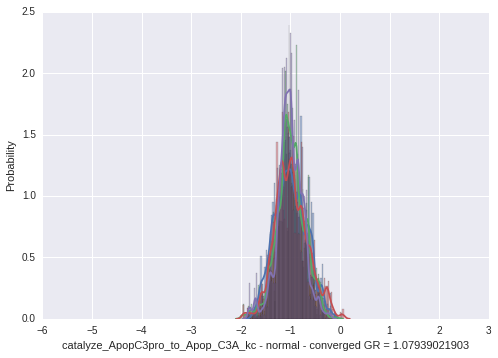

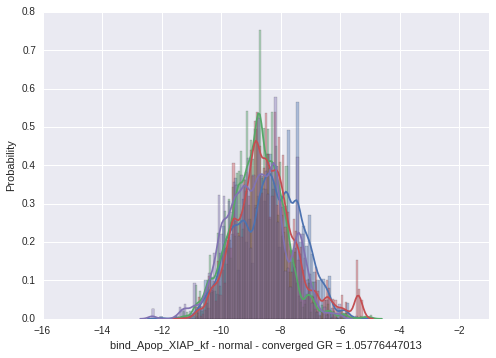

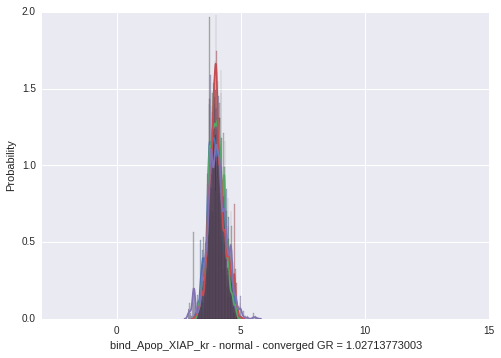

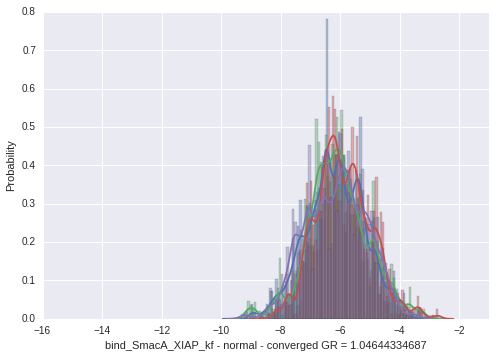

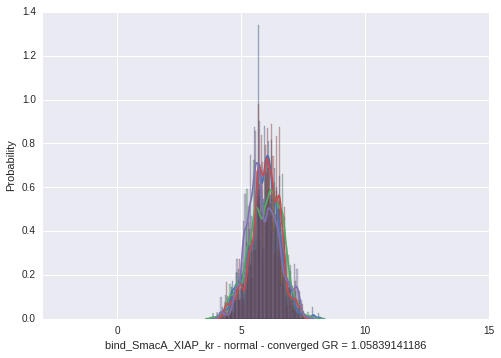

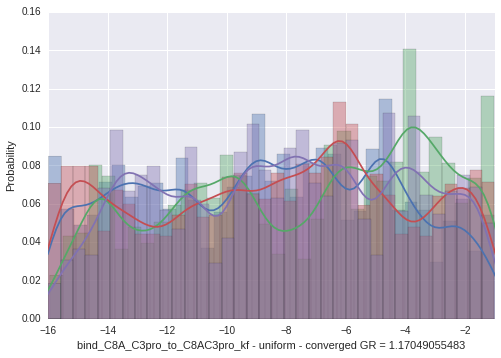

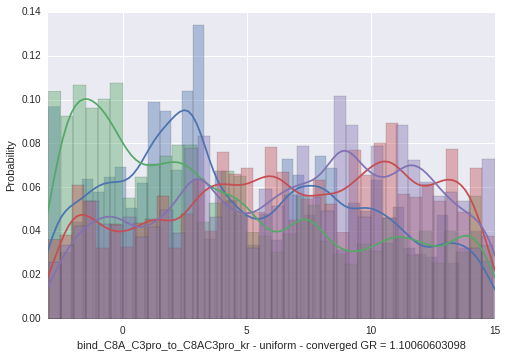

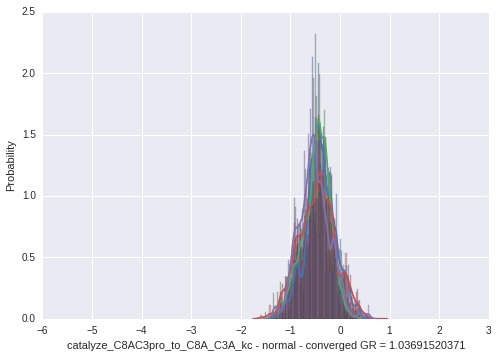

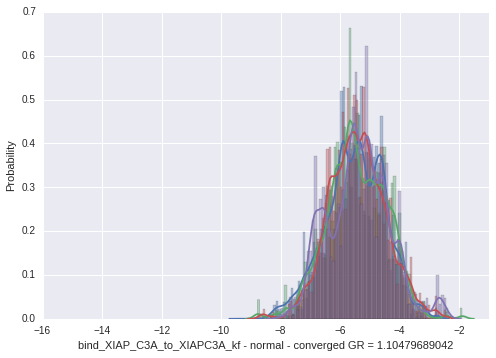

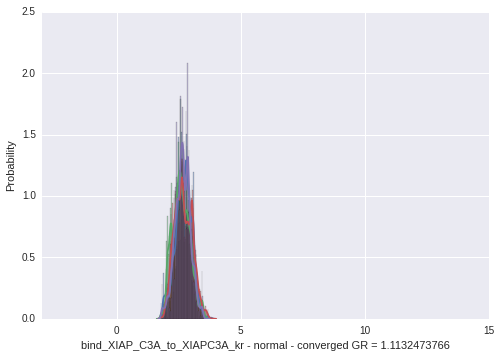

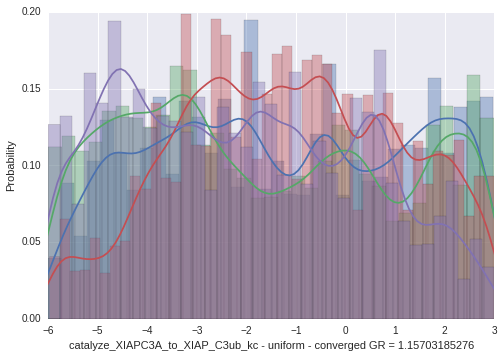

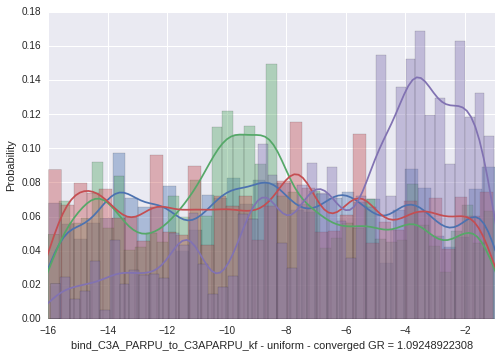

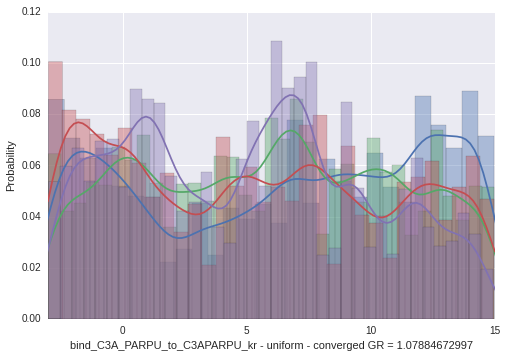

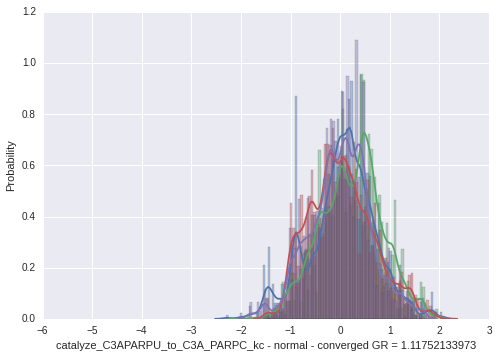

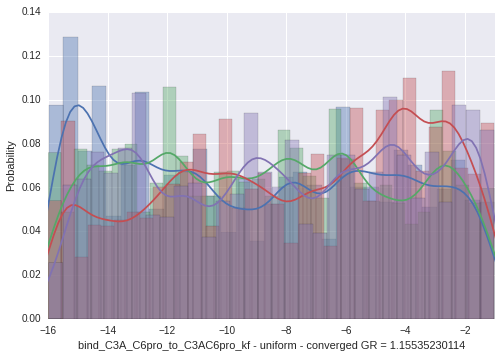

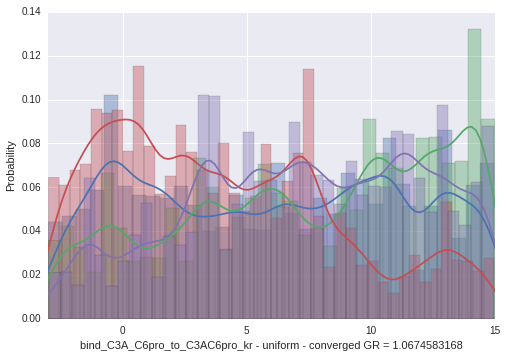

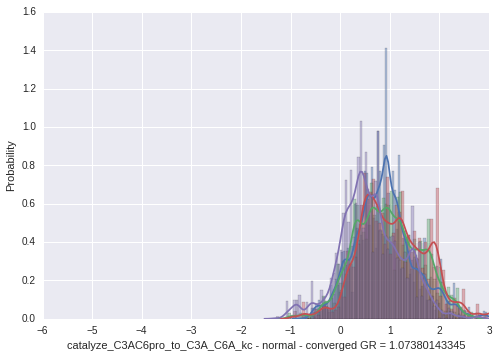

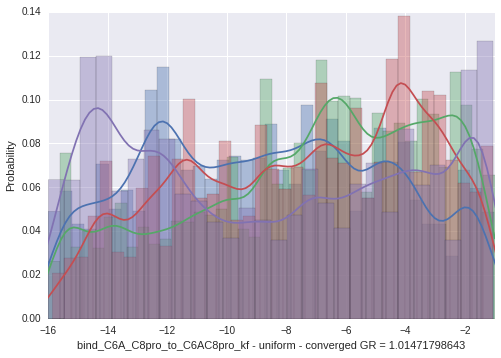

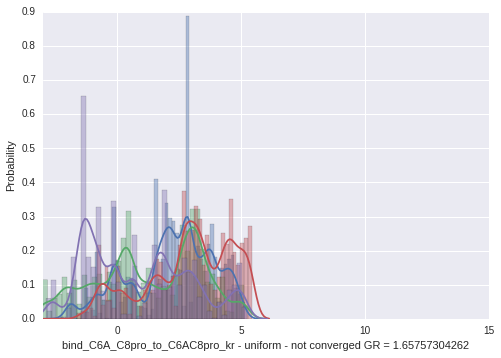

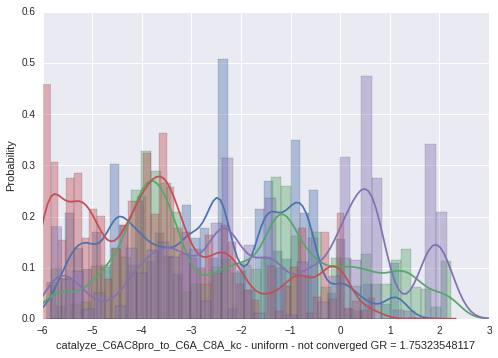

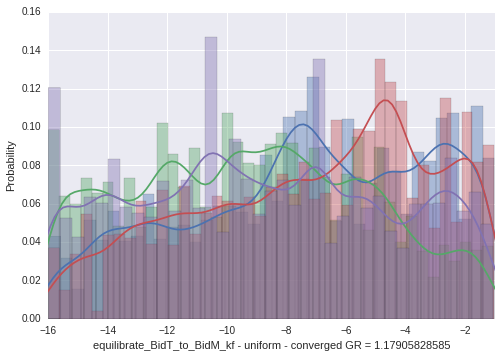

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    if earm_rates[param_name]['type'] == 'uniform':
        ax.set_xlim([earm_rates[param_name]['lower'], earm_rates[param_name]['upper']])
    elif 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

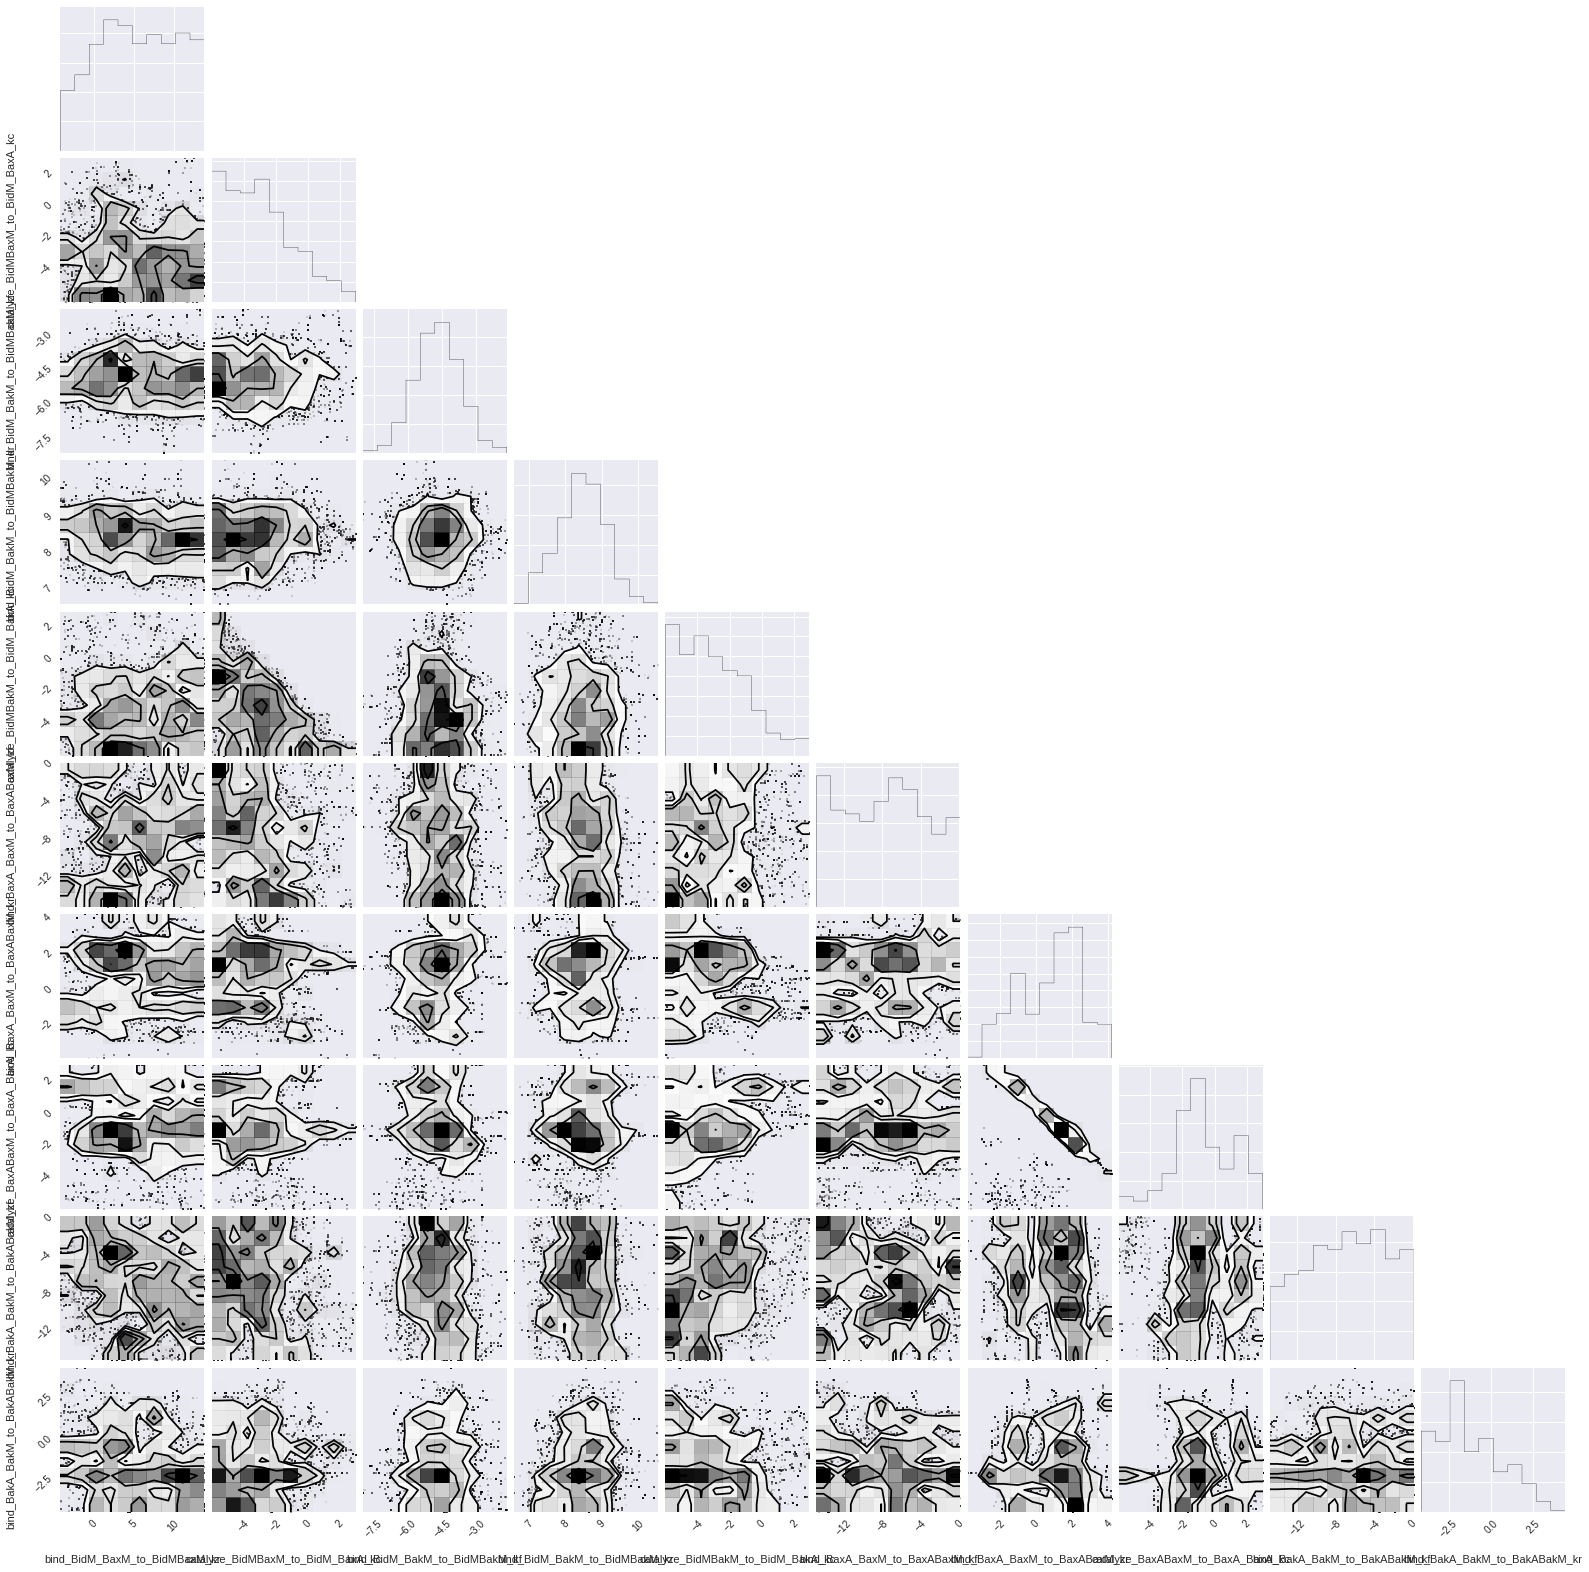

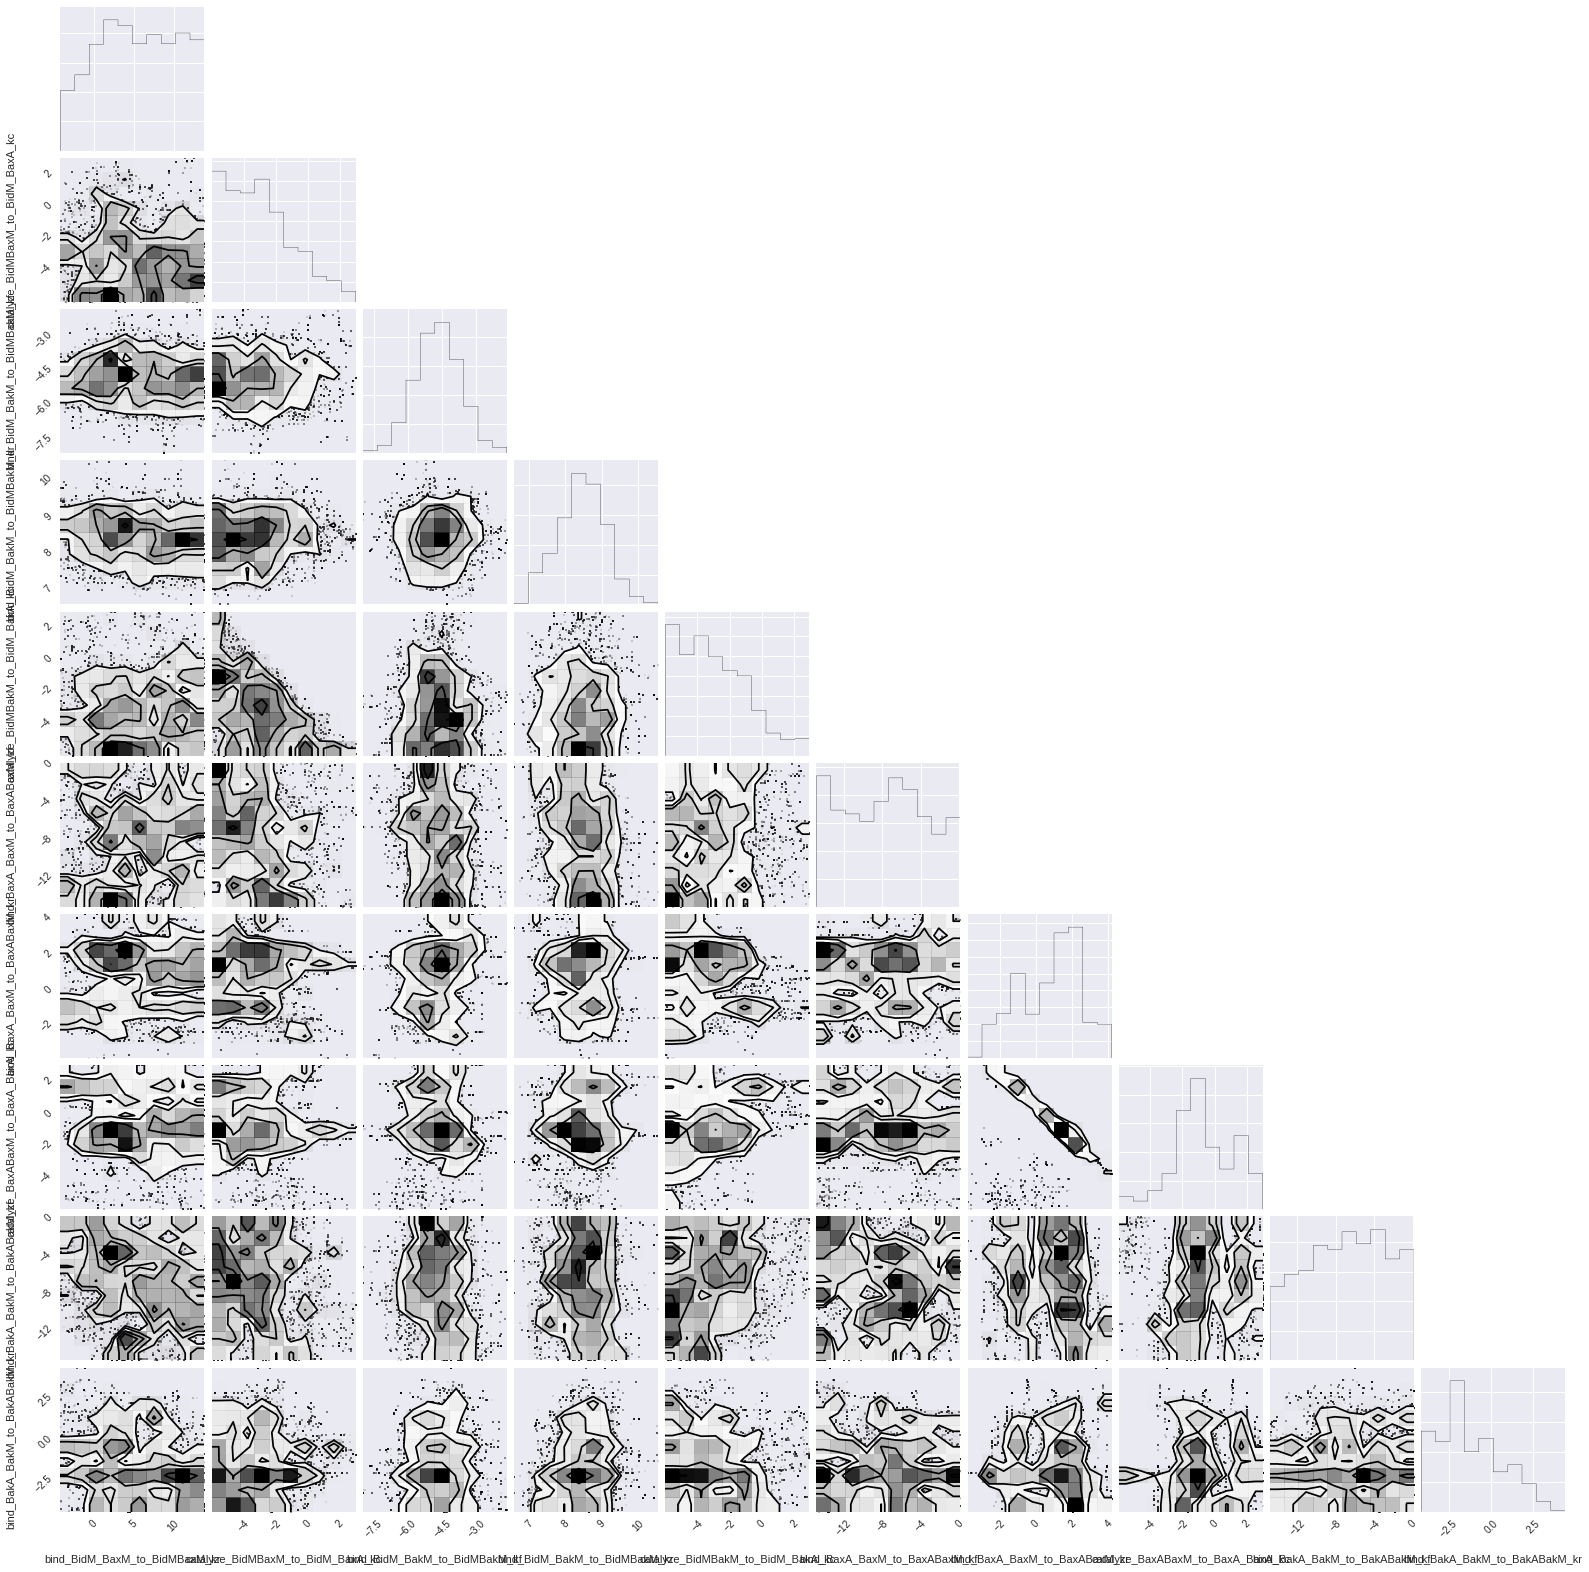

In [99]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)